# 선형회귀 분석
미국 보스톤 부동산 시세 데이터 분석(sklearn 패키지 제공).

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

### 데이터를 불러온다.

In [33]:
data = load_boston()

In [34]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [35]:
print(data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [36]:
X = data['data']
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [37]:
header = data['feature_names']
header

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
Y = data['target']
Y = Y.reshape(-1,1) # 행은 알아서 생성, 열은 1개
Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [39]:
header

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 데이터 프레임을 만들어 본다:

In [40]:
df = pd.DataFrame(np.append(X,Y,axis=1))

In [41]:
df.columns = np.append(header,'PRICE')

In [42]:
df.head(5) # 데이터 프레임 상단 5개 데이터

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
df.tail(5) # 데이터 프레임 하단 5개 데이터

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [44]:
len(df) #데이터의 행의 총갯수
len(header)  #헤더의 총갯수

13

### 여러 통계치를 계산해 본다:

In [45]:
#데이터프레임의 통계치를 한눈에 계산한다.
df.describe() 
# count 데이터수
# maen 평균값
# std 표준편차
# min 최소값
# 25% 분위수 25%
# 50% 분위수 50%
# 75% 분위수 75%
# max 최대값

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [46]:
np.round(df.corr(),4) # 데이터 프레임의 상관계수를 소수점 4자리까지 반올림

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.0000,-0.1995,0.4045,-0.0553,0.4175,-0.2199,0.3508,-0.3779,0.6220,0.5796,0.2883,-0.3774,0.4522,-0.3858
ZN,-0.1995,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
INDUS,0.4045,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
CHAS,-0.0553,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
NOX,0.4175,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2199,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3508,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
DIS,-0.3779,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
RAD,0.6220,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5796,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


#### 선형회귀 적용:

In [47]:
lm = LinearRegression()

In [48]:
lm.fit(X,Y) #상관관계 X축 data와 Y축 target으로 지정

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
lm.coef_ # 상관계수 계산

array([[-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,
         2.68856140e+00, -1.77957587e+01,  3.80475246e+00,
         7.51061703e-04, -1.47575880e+00,  3.05655038e-01,
        -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
        -5.25466633e-01]])

In [50]:
pd.DataFrame(lm.coef_, columns = header) #데이터 프레임 columns은 header , row는 상관계수

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.107171,0.046395,0.02086,2.688561,-17.795759,3.804752,0.000751,-1.475759,0.305655,-0.012329,-0.953464,0.009393,-0.525467


In [51]:
lm.intercept_ #Y절편값

array([36.49110328])

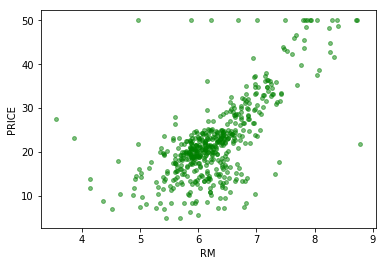

In [52]:
plt.scatter(X[:,5],Y[:,0],c = 'g' , s=15, alpha=0.5) #산점도 color = green , scale = 15, alpha(불투명도)=0.5
plt.xlabel('RM') # x값 라벨
plt.ylabel('PRICE') # y값 라벨 
plt.show()

#### 결정계수 ($R^2$):

In [53]:
lm.score(X,Y) #결정계수 총변동중에서 회귀선에 의해 설명이 되는 변동이 차지하는 비율, 회귀분석의 정확도를 따지는 기준

0.7406077428649428

#### 학습과 시험 (in and out-of-sample testing):¶

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=5)

In [55]:
X=pd.DataFrame(X_train)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.67180,0.0,18.10,0.0,0.7400,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98
1,7.36711,0.0,18.10,0.0,0.6790,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52
2,5.70818,0.0,18.10,0.0,0.5320,6.750,74.9,3.3317,24.0,666.0,20.2,393.07,7.74
3,0.01311,90.0,1.22,0.0,0.4030,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
4,0.15086,0.0,27.74,0.0,0.6090,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06
5,0.14030,22.0,5.86,0.0,0.4310,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90
6,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
7,0.41238,0.0,6.20,0.0,0.5040,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36
8,6.71772,0.0,18.10,0.0,0.7130,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44
9,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56


In [56]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [57]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)

In [58]:
print(lm.fit(X_train,Y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [59]:
print('Training MSE is:' + str(np.mean((Y_train - Y_pred_train)**2))) #mse 평균제곱오차 , 
#평균과의 관측지값의 오차의 제곱 평균, 작을 수록 데이터의 정확성이 높은것
print('Testing MSE is:' + str(np.mean((Y_test - Y_pred_test)**2)))

Training MSE is:19.071527965850713
Testing MSE is:30.70323220721905


### 잔차: 회귀선과 예측값의 차이

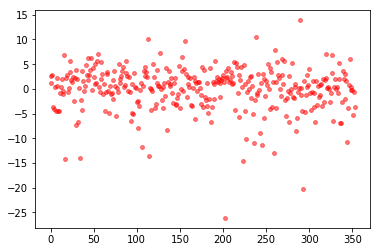

In [60]:
plt.scatter(np.arange(Y_train.size),Y_pred_train-Y_train, c = 'red', s= 15, alpha=0.5)

#### 신규 데이터와 가격 예측:      
        - CRIM     : 0.03
        - ZN       : 0.0
        - INDUS    : 13.0
        - CHAS     : 0.0
        - NOX      : 0.4
        - RM       : 4.3
        - AGE      : 23.5
        - DIS      : 1.9
        - RAD      : 1.0
        - TAX      : 273.0
        - PTRATIO  : 18.0 
        - B        : 380.0
        - LSTAT    : 7.5

In [61]:
X_new = np.array([0.03, 0.0, 13.0, 0.0, 0.4, 4.3, 23.5, 1.9, 1.0, 273.0, 18.0, 380.0, 7.5])
Y_pred_new = lm.predict(X_new)
print(Y_pred_new[0,0])

ValueError: Expected 2D array, got 1D array instead:
array=[3.00e-02 0.00e+00 1.30e+01 0.00e+00 4.00e-01 4.30e+00 2.35e+01 1.90e+00
 1.00e+00 2.73e+02 1.80e+01 3.80e+02 7.50e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.